In [7]:
# !pip install pandas matplotlib numpy

import os 
import shutil
import pandas as pd
import numpy as np
import matplotlib as plt


This cell just takes the mice that matter `["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260"]
` and creates a copy that is named mouseID_session_ID_trial_info.csv that we will work with, as a back-up. 

> In this case, this was already ran this and the files are already in BOX, so don't run this again for now 

In [ ]:

#define the path to the mouse data
main_path = 'C:/Users/aleja/Box/Awake Project/Maze data/simplermaze'

#these are the mice we are interested in
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260"]


mouse_data = []
for mouse in os.listdir(main_path):
    mid = next(
        (m for m in mice_that_matter 
         if f"mouse{m}" in mouse 
         or f"mouse {m}" in mouse 
         or f"MOUSE{m}" in mouse),
        None
    )

    if mid:  # if a match was found
        mouse_data.append(mouse)

        mouse_dir  = main_path + "/" + mouse
        print(mouse)

        for sessions in os.listdir(mouse_dir):
            sessions_dir = mouse_dir + "/" + sessions

            #rename the sessions to make sure that session_ID all has the same format, aka session#.#

            sessions= sessions.replace(" ", "") #remove spaces
            sessions= sessions.replace("_", "") # remove _ 

            sessions = sessions.replace("habituation", "session1.1") #change habituation with 1.1

            session_ID = sessions[-10:] #I'm sure there is a quicker way to do this but I don't know it lol
            print("    "+ session_ID)

            for files in os.listdir(sessions_dir):

                # only get files that have session_data and .csv in the name
                if ".csv" in files and "session_data" in files:

                    source_file = os.path.join(sessions_dir, files)

                    print("        "+files)

                    #make a copy of the trial files just in case

                    # new_name = f"mouse{mid}_{session_ID}_trial_info.csv"

                    # new_file = os.path.join(sessions_dir, new_name)

                    # print(f"copying {source_file} into {new_file}")

                    # shutil.copyfile(source_file, new_file)
                    



mouse 6357
    session3.2
        session_data_2024-08-21_11_14_22.csv
    session3.3
        session_data_2024-08-22_14_33_31.csv
    session3.4
        session_data_2024-08-23_10_42_22.csv
    session3.5
        session_data_2024-08-27_13_05_19.csv
    session3.6
        session_data_2024-08-28_11_58_14.csv
    session3.7
        session_data_2024-08-29_10_23_02.csv
    session3.8
        session_data_2024-08-30_10_07_55.csv
    session1.1
        session_data_2024-08-15_11_23_10.csv
    session3.1
        session_data_2024-08-19_12_36_04.csv
mouse 6359
    session3.2
        session_data_2024-08-21_12_15_03.csv
    session3.3
        session_data_2024-08-22_15_38_26.csv
    session3.4
        session_data_2024-08-23_12_13_19.csv
    session3.5
        session_data_2024-08-27_14_08_35.csv
    session3.6
        session_data_2024-08-28_13_28_27.csv
    session3.7
        session_data_2024-08-29_11_39_28.csv
    session3.8
        session_data_2024-08-30_11_28_10.csv
    session1.1
   

this cell essentially stores all these files in a list called `all_mice_sessions`

In [18]:
main_path = 'C:/Users/aleja/Box/Awake Project/Maze data/simplermaze'

all_mice_sessions = []

for mouse in os.listdir(main_path):
    if "mouse" in mouse:
        mouse_path = os.path.join(main_path, mouse)

        for sessions in os.listdir(mouse_path):
            session_path = os.path.join(mouse_path, sessions)

            for file in os.listdir(session_path):
                if "trial_info.csv" in file: 
                    # print(file)
                    all_mice_sessions.append(session_path + "/" + file)
                    
                    #check if there is any inconsistency with the naming
                    if "session" not in file:
                        print(file)
        
        
print(len(all_mice_sessions))
#chack the naming
for i in all_mice_sessions:
    folder = os.path.dirname(i)
    fname = os.path.basename(i)
    print (fname)

145
mouse6357_session3.2_trial_info.csv
mouse6357_session3.3_trial_info.csv
mouse6357_session3.4_trial_info.csv
mouse6357_session3.5_trial_info.csv
mouse6357_session3.6_trial_info.csv
mouse6357_session3.7_trial_info.csv
mouse6357_session3.8_trial_info.csv
mouse6357_session1.1_trial_info.csv
mouse6357_session3.1_trial_info.csv
mouse6359_session3.2_trial_info.csv
mouse6359_session3.3_trial_info.csv
mouse6359_session3.4_trial_info.csv
mouse6359_session3.5_trial_info.csv
mouse6359_session3.6_trial_info.csv
mouse6359_session3.7_trial_info.csv
mouse6359_session3.8_trial_info.csv
mouse6359_session1.1_trial_info.csv
mouse6359_session3.1_trial_info.csv
mouse8938_session1.1_trial_info.csv
mouse8938_session3.1_trial_info.csv
mouse8938_session3.2_trial_info.csv
mouse8938_session3.3_trial_info.csv
mouse8938_session3.4_trial_info.csv
mouse8938_session3.5_trial_info.csv
mouse8938_session3.6_trial_info.csv
mouse8938_session3.7_trial_info.csv
mouse8938_session3.8_trial_info.csv
mouse8938_session3.8_tri

this script is the one used to fix a lil naming mistake I made, nothing major. 
But it's important to note that once Shahd will have the session id of the ones that are just numbers, this is the cell that will need to be modified. 

DONE

In [ ]:

for i in all_mice_sessions:
    folder = os.path.dirname(i)
    fname = os.path.basename(i)

    if "session" not in fname:

        snippet = fname.split("_")[1] #get the part after the first _ , therefore the session

        
        if "ession" in snippet:
            snippet = snippet.replace("ession", "session")

        elif "session" not in snippet:

            # here I need to tailor the name to the individual trial
            if "mouse8939" in fname and "3.1" in fname:
                snippet = "session3.1"
            elif "mouse9129_0282091291" in fname:
                snippet = "session1.2"
            else:
                snippet= "session1.1"



        mid = fname.split("_")[0]   # gets the part befoer the _ , therefore the mouse_ID
        new_name = f"{mid}_{snippet}_trial_info.csv"
        new_path = os.path.join(folder, new_name)

        print("RENAMING:", i, "->", new_path)
        os.rename(i, new_path) 


RENAMING: C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse8938\2025-02-18_12_02_3489381/mouse8938_2023489381_trial_info.csv -> C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse8938\2025-02-18_12_02_3489381\mouse8938_session1.1_trial_info.csv
RENAMING: C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse8939\2025-02-19_10_28_2091291/mouse8939_0282091291_trial_info.csv -> C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse8939\2025-02-19_10_28_2091291\mouse8939_session1.1_trial_info.csv
RENAMING: C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse8939\2025-02-19_11_26_2789393.1/mouse8939_62789393.1_trial_info.csv -> C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse8939\2025-02-19_11_26_2789393.1\mouse8939_session3.1_trial_info.csv
RENAMING: C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse8941\2025-02-18_14_27_3389411/mouse8941_4273389411_trial_info.csv -> C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse89

: 

Here we sort the .csvs in `all_mice_sessions` into another variable called `all_mice_sessions_sorted`. Is it necessary? not really. But it helps me understand 

In [ ]:
def key(p):
    fname = os.path.basename(p) # gets just the filename and not the whole path to get to it
    parts = fname.replace(".csv", "").split("_")  # ["mouse8938", "session3.10", "trial", "info"]
    mouse = parts[0].replace("mouse", "")
    session = parts[1].replace("session", "")
    major, *minor = session.split(".")
    return int(mouse), int(major), int(minor[0]) if minor else 0

all_mice_sessions_sorted = sorted(all_mice_sessions, key=key)

for i in all_mice_sessions_sorted:
    print(i)



C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\habituation/mouse6357_session1.1_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\session 3.1/mouse6357_session3.1_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-21_11_14_226357session3.2/mouse6357_session3.2_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-22_14_33_316357session3.3/mouse6357_session3.3_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-23_10_42_226357session3.4/mouse6357_session3.4_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-27_13_05_196357session3.5/mouse6357_session3.5_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-28_11_58_146357session3.6/mouse6357_session3.6_trial_info.csv
C:/Users/aleja/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-29_10_23_026357ses

Now we start modifying the datasets. 
1. First thing first, rew_location/area_rewarded are a character, while first_reward_area_visited is rew + character, so we need to add a new column, like `first_rew_area_visited_char` where we just get the final character and apply it to all these datasets. 
   
2. Second, this doesn't really tell us if the mouse eventually reached the reward area, so we need to add a `has_reached_rew_area`. This basically checks rew_location and then will check if any time was spent in any of the rew columns (it would need to be !=0)
3. In some trials the mouse was not detected to have entered the maze but the mouse went to the correct rew_area, so if `first_rew_area_visited_char`== `rew_location` then hit = 1, miss = incorrect = 0

In [60]:
def adjust_datasets(CSV_FILE):
    df = pd.read_csv(CSV_FILE)

    # Drop the rows where the mouse did not enter a reward area
    df = df.dropna(subset=['first_reward_area_visited'])

    #convert NaN to 0
    df = df.fillna(0)

    #convert numerical values to int
    df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')



    if "first_rew_area_visited_char" not in df.columns:
    # insert column "first_rew_area_visited_char" that contains only the last character of the 

        df.insert(5, "first_rew_area_visited_char", df["first_reward_area_visited"].astype(str).str[-1])

    if "has_reached_rew_area" not in df.columns:

        # now we check if the mouse ever got to the correct ROI 
        rew_cols = "rew" + df["rew_location"]

        #row indices 
        rows = np.arange(len(df))

        # get the correct values from the matching column for each row
        values = df[rew_cols].to_numpy()[rows, np.arange(len(df))]


        df.insert(6, "has_reached_rew_area",(values != 0).astype(int))

        # now let's correct the incorrect hits/misses/incorrects 
        # condition: first_rew_area_visited_char equals rew_location
        mask = df["first_rew_area_visited_char"] == df["rew_location"]

        # update hit/miss/incorrect accordingly
        df.loc[mask, ["hit", "miss", "incorrect"]] = [1, 0, 0]

    df.to_csv(CSV_FILE, index=False)
    name_file= os.path.basename(CSV_FILE)
    print(f"converted {name_file}")


for i in all_mice_sessions_sorted:
    adjust_datasets(i)


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse6357_session1.1_trial_info.csv
converted mouse6357_session3.1_trial_info.csv
converted mouse6357_session3.2_trial_info.csv
converted mouse6357_session3.3_trial_info.csv
converted mouse6357_session3.4_trial_info.csv
converted mouse6357_session3.5_trial_info.csv
converted mouse6357_session3.6_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse6357_session3.7_trial_info.csv
converted mouse6357_session3.8_trial_info.csv
converted mouse6359_session1.1_trial_info.csv
converted mouse6359_session3.1_trial_info.csv
converted mouse6359_session3.2_trial_info.csv
converted mouse6359_session3.3_trial_info.csv
converted mouse6359_session3.4_trial_info.csv
converted mouse6359_session3.5_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse6359_session3.6_trial_info.csv
converted mouse6359_session3.7_trial_info.csv
converted mouse6359_session3.8_trial_info.csv
converted mouse8938_session1.1_trial_info.csv
converted mouse8938_session3.1_trial_info.csv
converted mouse8938_session3.2_trial_info.csv
converted mouse8938_session3.3_trial_info.csv
converted mouse8938_session3.4_trial_info.csv
converted mouse8938_session3.5_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse8938_session3.6_trial_info.csv
converted mouse8938_session3.7_trial_info.csv
converted mouse8938_session3.8_trial_info.csv
converted mouse8938_session3.8_trial_info.csv
converted mouse8938_session3.9_trial_info.csv
converted mouse8938_session3.10_trial_info.csv
converted mouse8938_session3.11_trial_info.csv
converted mouse8938_session3.12_trial_info.csv
converted mouse8939_session1.1_trial_info.csv
converted mouse8939_session3.1_trial_info.csv
converted mouse8939_session3.1_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse8939_session3.2_trial_info.csv
converted mouse8939_session3.3_trial_info.csv
converted mouse8939_session3.4_trial_info.csv
converted mouse8939_session3.5_trial_info.csv
converted mouse8939_session3.6_trial_info.csv
converted mouse8939_session3.7_trial_info.csv
converted mouse8939_session3.8_trial_info.csv
converted mouse8939_session3.8_trial_info.csv
converted mouse8939_session3.9_trial_info.csv
converted mouse8939_session3.10_trial_info.csv
converted mouse8939_session3.11_trial_info.csv
converted mouse8939_session3.12_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse8941_session1.1_trial_info.csv
converted mouse8941_session3.1_trial_info.csv
converted mouse8941_session3.2_trial_info.csv
converted mouse8941_session3.3_trial_info.csv
converted mouse8941_session3.4_trial_info.csv
converted mouse8941_session3.5_trial_info.csv
converted mouse8941_session3.6_trial_info.csv
converted mouse8941_session3.7_trial_info.csv
converted mouse8941_session3.8_trial_info.csv
converted mouse8941_session3.9_trial_info.csv
converted mouse8941_session3.10_trial_info.csv
converted mouse8941_session3.11_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse8941_session3.12_trial_info.csv
converted mouse9129_session1.1_trial_info.csv
converted mouse9129_session1.2_trial_info.csv
converted mouse9129_session3.1_trial_info.csv
converted mouse9129_session3.2_trial_info.csv
converted mouse9129_session3.3_trial_info.csv
converted mouse9129_session3.4_trial_info.csv
converted mouse9129_session3.5_trial_info.csv
converted mouse9129_session3.6_trial_info.csv
converted mouse9129_session3.7_trial_info.csv
converted mouse9129_session3.8_trial_info.csv
converted mouse9129_session3.9_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse9129_session3.10_trial_info.csv
converted mouse9129_session3.11_trial_info.csv
converted mouse9129_session3.12_trial_info.csv
converted mouse9257_session1.1_trial_info.csv
converted mouse9257_session3.1_trial_info.csv
converted mouse9257_session3.2_trial_info.csv
converted mouse9257_session3.3_trial_info.csv
converted mouse9257_session3.4_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse9257_session3.5_trial_info.csv
converted mouse9257_session3.6_trial_info.csv
converted mouse9257_session3.7_trial_info.csv
converted mouse9257_session3.8_trial_info.csv
converted mouse9258_session1.1_trial_info.csv
converted mouse9258_session3.1_trial_info.csv
converted mouse9258_session3.2_trial_info.csv
converted mouse9258_session3.3_trial_info.csv
converted mouse9258_session3.4_trial_info.csv
converted mouse9258_session3.5_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse9258_session3.6_trial_info.csv
converted mouse9258_session3.7_trial_info.csv
converted mouse9258_session3.8_trial_info.csv
converted mouse9259_session1.1_trial_info.csv
converted mouse9259_session3.1_trial_info.csv
converted mouse9259_session3.2_trial_info.csv
converted mouse9259_session3.3_trial_info.csv
converted mouse9259_session3.4_trial_info.csv
converted mouse9259_session3.5_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse9259_session3.6_trial_info.csv
converted mouse9259_session3.7_trial_info.csv
converted mouse9259_session3.8_trial_info.csv
converted mouse9260_session1.1_trial_info.csv
converted mouse9260_session3.1_trial_info.csv
converted mouse9260_session3.2_trial_info.csv
converted mouse9260_session3.3_trial_info.csv
converted mouse9260_session3.4_trial_info.csv
converted mouse9260_session3.5_trial_info.csv
converted mouse9260_session3.6_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse9260_session3.7_trial_info.csv
converted mouse9260_session3.8_trial_info.csv
converted mouse9493_session1.1_trial_info.csv
converted mouse9493_session3.1_trial_info.csv
converted mouse9493_session3.2_trial_info.csv
converted mouse9493_session3.3_trial_info.csv
converted mouse9493_session3.4_trial_info.csv
converted mouse9493_session3.5_trial_info.csv
converted mouse9493_session3.6_trial_info.csv
converted mouse9493_session3.7_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse9493_session3.8_trial_info.csv
converted mouse9494_session1.1_trial_info.csv
converted mouse9494_session3.1_trial_info.csv
converted mouse9494_session3.2_trial_info.csv
converted mouse9494_session3.3_trial_info.csv
converted mouse9494_session3.4_trial_info.csv
converted mouse9494_session3.5_trial_info.csv
converted mouse9494_session3.6_trial_info.csv
converted mouse9494_session3.7_trial_info.csv
converted mouse9496_session1.1_trial_info.csv
converted mouse9496_session3.1_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

converted mouse9496_session3.2_trial_info.csv
converted mouse9496_session3.3_trial_info.csv
converted mouse9496_session3.4_trial_info.csv
converted mouse9496_session3.5_trial_info.csv
converted mouse9496_session3.6_trial_info.csv
converted mouse9496_session3.7_trial_info.csv
converted mouse9496_session3.8_trial_info.csv
converted mouse9497_session1.1_trial_info.csv
converted mouse9497_session3.1_trial_info.csv
converted mouse9497_session3.2_trial_info.csv
converted mouse9497_session3.3_trial_info.csv
converted mouse9497_session3.4_trial_info.csv
converted mouse9497_session3.5_trial_info.csv
converted mouse9497_session3.6_trial_info.csv
converted mouse9497_session3.7_trial_info.csv
converted mouse9497_session3.8_trial_info.csv


C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast='integer')
C:\Users\aleja\AppData\Local\Temp\ipykernel_8752\502319871.py:11: FutureWarning: errors='ignore' is deprecated and 

In [ ]:


def calculate_left_right_time(filepaths):
    results = {}
    for path in filepaths:
        df = pd.read_csv(path)

        # Ensure numeric types
        df['trial_start_time'] = pd.to_numeric(df['trial_start_time'], errors='coerce')
        df['end_trial_time'] = pd.to_numeric(df['end_trial_time'], errors='coerce')
        df['trial_duration'] = (df['end_trial_time'] - df['trial_start_time']) / 1000  # convert ms to seconds


        # Calculate left and right times
        left_time = df['rewA'].sum() + df['rewB'].sum()
        right_time = df['rewC'].sum() + df['rewD'].sum()
        
        # ✅ Now calculate proportions inside the loop
        total_time = left_time + right_time
        left_prop = left_time / total_time if total_time > 0 else 0
        right_prop = right_time / total_time if total_time > 0 else 0

        results[path] = {
            'Left_time': left_time,
            'Right_time': right_time,
            'Left_prop': left_prop,
            'Right_prop': right_prop
        }

    return pd.DataFrame(results).T






def plot_left_right(summary_df):
    # Plot absolute times
    summary_df[['Left_time', 'Right_time']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Total Time (s)")
    plt.title("Time spent Left vs Right per Session")
    plt.legend(title="Side")
    plt.tight_layout()
    plt.show()

    # Plot proportions
    summary_df[['Left_prop', 'Right_prop']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Proportion of Time")
    plt.title("Proportion of Time Left vs Right per Session")
    plt.legend(title="Side")
    plt.tight_layout()
    plt.show()


#define filepaths 


summary = calculate_left_right_time(filepaths)
# Relabel index to "session 1", "session 2", ...
summary.index = [f"session {i+1}" for i in range(len(summary))]
print(summary)

plot_left_right(summary)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv'

                                                    Left_time  Right_time  \
C:\Users\shahd\Box\Awake Project\Maze data\simp...   328062.0    438201.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   312882.0    503640.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   300370.0    443856.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   350017.0    588219.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   207109.0    298344.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  1044719.0    313499.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   674567.0    190979.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   888971.0    539990.0   

                                                    Left_prop  Right_prop  
C:\Users\shahd\Box\Awake Project\Maze data\simp...   0.428132    0.571868  
C:\Users\shahd\Box\Awake Project\Maze data\simp...   0.383189    0.616811  
C:\Users\shahd\Box\Awake Project\Maze data\simp...   0.403601    0.596399  
C:

AttributeError: module 'matplotlib' has no attribute 'ylabel'

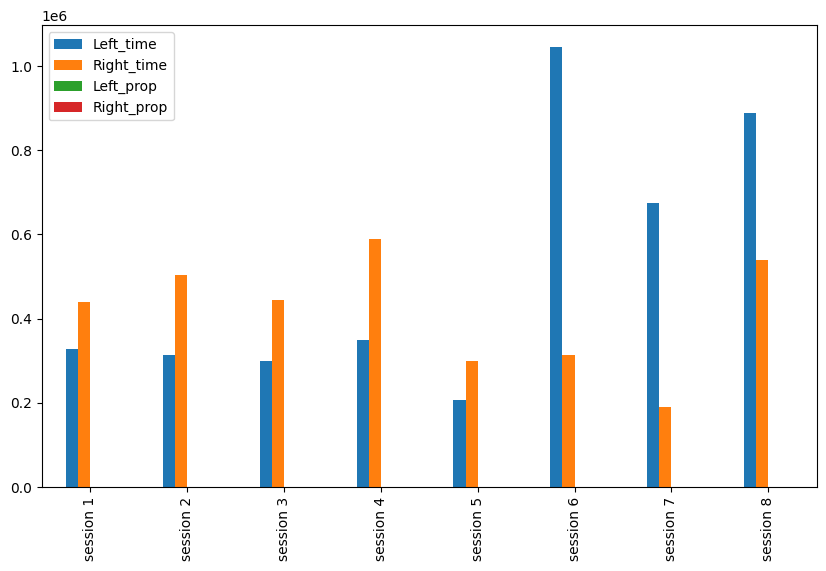

In [ ]:
#how much time the mouse spends on the right (rewC and rewD) vs the left (rewA and B)

import pandas as pd
import os

def calculate_filtered_left_right_time(filepaths):
    results = {}

    for path in filepaths:
        try:
            df = pd.read_csv(path)

            # Convert timestamps to numeric
            df['trial_start_time'] = pd.to_numeric(df['trial_start_time'], errors='coerce')
            df['end_trial_time'] = pd.to_numeric(df['end_trial_time'], errors='coerce')

            # Drop rows with missing timestamps
            df = df.dropna(subset=['trial_start_time', 'end_trial_time'])

            # Calculate trial duration
            df['trial_duration'] = (df['end_trial_time'] - df['trial_start_time']) / 1000  # convert ms to seconds


            # Filter out invalid durations
            df = df[df['trial_duration'] > 0]

            # Remove outliers using IQR
            Q1 = df['trial_duration'].quantile(0.25)
            Q3 = df['trial_duration'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df['trial_duration'] >= lower_bound) & (df['trial_duration'] <= upper_bound)]

            # Convert to numeric and drop NaNs
            for col in ['rewA', 'rewB', 'rewC', 'rewD']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            # Drop rows with any NaNs in reward columns
            df = df.dropna(subset=['rewA', 'rewB', 'rewC', 'rewD'])

            # Remove extreme outliers using IQR
            for col in ['rewA', 'rewB', 'rewC', 'rewD']:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


            # Remove rows with extreme values in any reward column
            for col in ['rewA', 'rewB', 'rewC', 'rewD']:
                df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]



            # Sum durations for left and right zones
            left_time = df['rewA'].sum() + df['rewB'].sum()
            right_time = df['rewC'].sum() + df['rewD'].sum()


            results[os.path.basename(path)] = {'Left_time': left_time, 'Right_time': right_time}

        except Exception as e:
            print(f"⚠️ Error processing {path}: {e}")

    return pd.DataFrame(results).T



# Example usage with your two CSVs
filepaths = [
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-21_11_14_226357session3.2/session_data_2024-08-21_11_14_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-22_14_33_316357session3.3/session_data_2024-08-22_14_33_31.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-23_10_42_226357session3.4/session_data_2024-08-23_10_42_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-27_13_05_196357session3.5/session_data_2024-08-27_13_05_19.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-28_11_58_146357session3.6/session_data_2024-08-28_11_58_14.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-29_10_23_026357session3.7/session_data_2024-08-29_10_23_02.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-30_10_07_556357session3.8/session_data_2024-08-30_10_07_55.csv"
]


summary = calculate_left_right_time(filepaths)
print(summary)

summary = calculate_left_right_time(filepaths)
# Relabel index to "session 1", "session 2", ...
summary.index = [f"session {i+1}" for i in range(len(summary))]
summary.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Time Spent (s)")
plt.title("Time in Left vs. Right Reward Zones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                                                        rewA      rewD  \
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.357143  0.285714   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.166667  0.055556   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.150000  0.100000   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.117647  0.117647   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.148148  0.111111   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.142857  0.023810   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.428571  0.102041   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.400000  0.022222   

                                                        rewC      rewB  
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.285714  0.071429  
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.666667  0.111111  
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.700000  0.050000  
C:\Users\shahd\Box\Awake Project\Maze dat

C:\Users\shahd\AppData\Local\Temp\ipykernel_63508\76346633.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


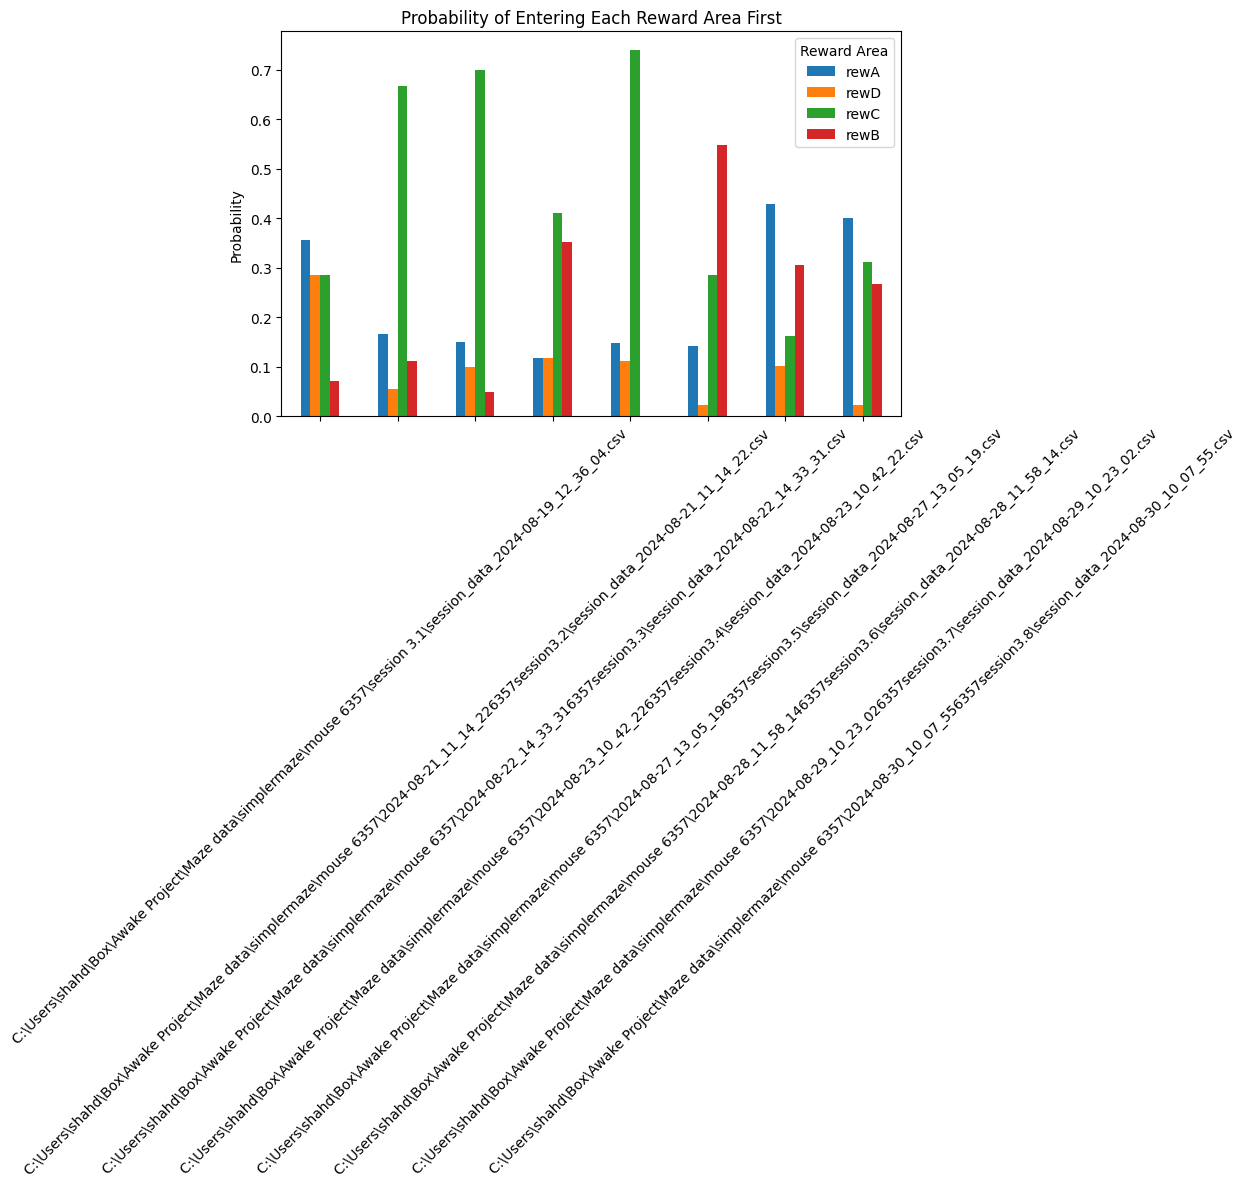

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_entry_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop NaNs from first_reward_area_visited
        valid = df['first_reward_area_visited'].dropna()

        # Count occurrences
        counts = valid.value_counts()

        # Convert to probabilities
        probs = counts / counts.sum()

        # Store results
        results[path] = probs.to_dict()

    return pd.DataFrame(results).T.fillna(0)


def plot_entry_probabilities(prob_df):
    prob_df.plot(kind="bar", figsize=(8, 5), rot=45)
    plt.ylabel("Probability")
    plt.title("Probability of Entering Each Reward Area First")
    plt.legend(title="Reward Area")
    plt.tight_layout()
    plt.show()


# Example usage
filepaths = [
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-21_11_14_226357session3.2/session_data_2024-08-21_11_14_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-22_14_33_316357session3.3/session_data_2024-08-22_14_33_31.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-23_10_42_226357session3.4/session_data_2024-08-23_10_42_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-27_13_05_196357session3.5/session_data_2024-08-27_13_05_19.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-28_11_58_146357session3.6/session_data_2024-08-28_11_58_14.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-29_10_23_026357session3.7/session_data_2024-08-29_10_23_02.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-30_10_07_556357session3.8/session_data_2024-08-30_10_07_55.csv"
]

entry_probs = calculate_entry_probabilities(filepaths)
# Relabel index to "session 1", "session 2", ...
summary.index = [f"session {i+1}" for i in range(len(summary))]
print(entry_probs)

plot_entry_probabilities(entry_probs)


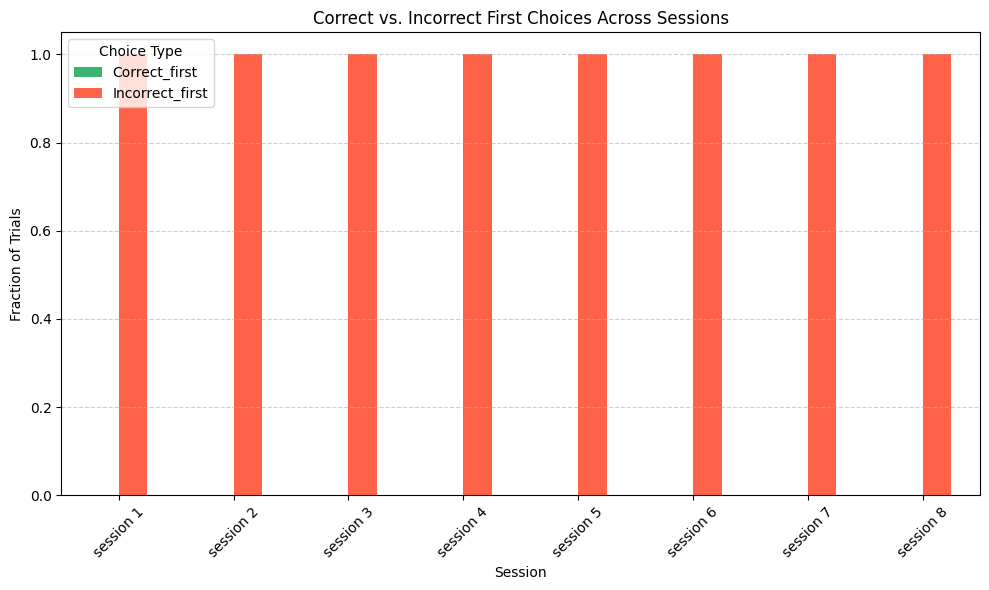

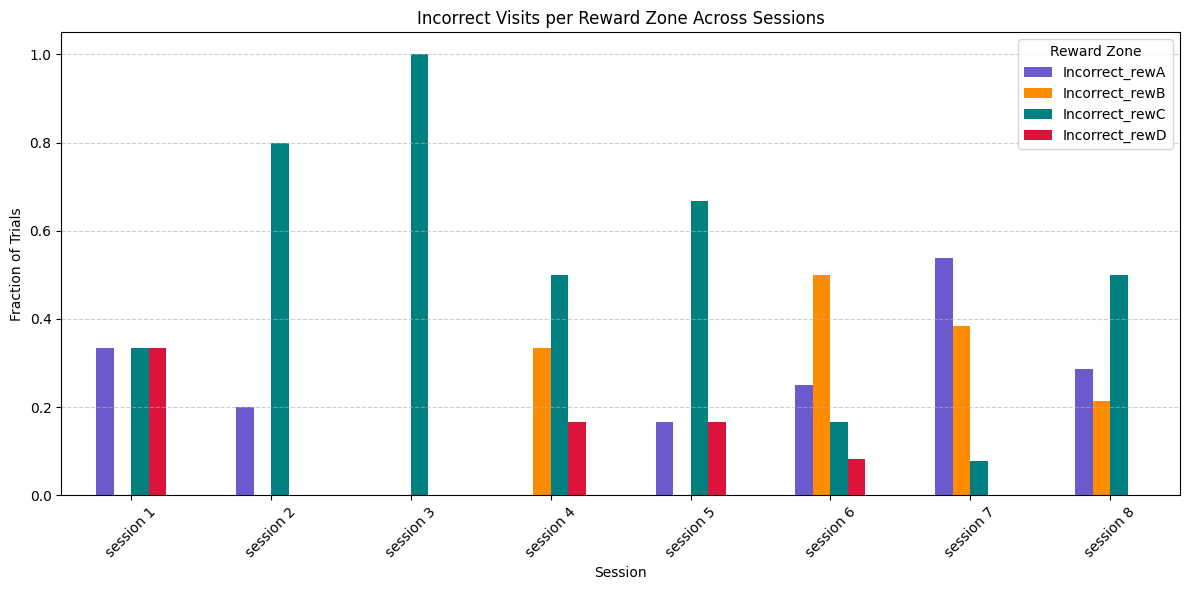

           Correct_first  Incorrect_first  Incorrect_rewA  Incorrect_rewB  \
session 1            0.0              1.0        0.333333        0.000000   
session 2            0.0              1.0        0.200000        0.000000   
session 3            0.0              1.0        0.000000        0.000000   
session 4            0.0              1.0        0.000000        0.333333   
session 5            0.0              1.0        0.166667        0.000000   
session 6            0.0              1.0        0.250000        0.500000   
session 7            0.0              1.0        0.538462        0.384615   
session 8            0.0              1.0        0.285714        0.214286   

           Incorrect_rewC  Incorrect_rewD  
session 1        0.333333        0.333333  
session 2        0.800000        0.000000  
session 3        1.000000        0.000000  
session 4        0.500000        0.166667  
session 5        0.666667        0.166667  
session 6        0.166667        0.083333 

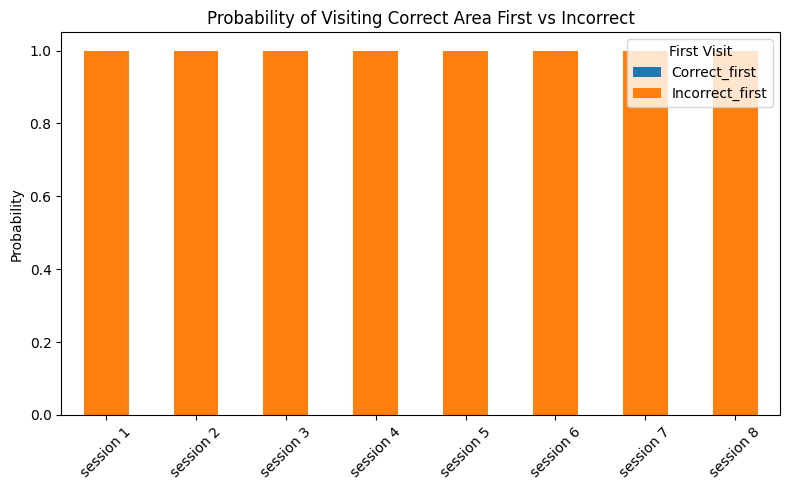

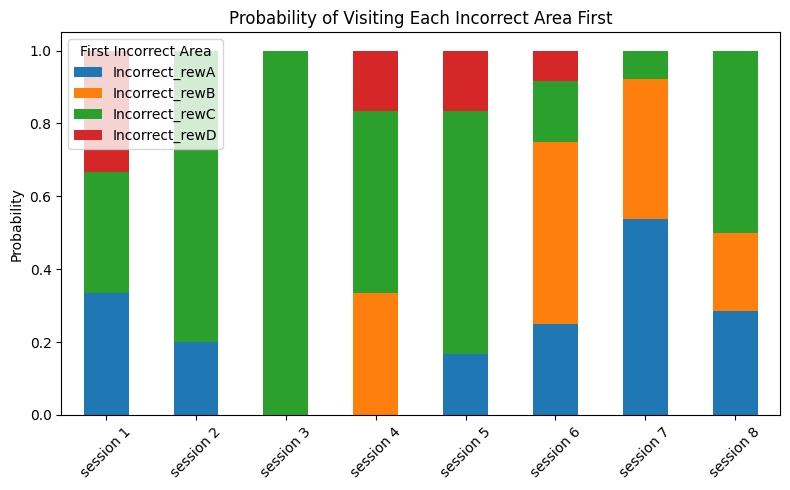

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_first_visit_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop rows without data
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_first = (df['first_reward_area_visited'] == df['area_rewarded']).sum()

        # Incorrect first visits (split by which area)
        incorrect_counts = df.loc[df['first_reward_area_visited'] != df['area_rewarded'], 'first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": 1 - (correct_first / total_trials)
        }

        # Add per-area incorrect probabilities
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_probabilities(summary_df):
    # Plot correct vs incorrect stacked
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Correct Area First vs Incorrect")
    plt.legend(title="First Visit")
    plt.tight_layout()
    plt.show()

    # Plot breakdown of incorrect first visits by area
    incorrect_cols = [col for col in summary_df.columns if col.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Each Incorrect Area First")
    plt.legend(title="First Incorrect Area")
    plt.tight_layout()
    plt.show()


# Example usage
filepaths = [
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-21_11_14_226357session3.2/session_data_2024-08-21_11_14_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-22_14_33_316357session3.3/session_data_2024-08-22_14_33_31.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-23_10_42_226357session3.4/session_data_2024-08-23_10_42_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-27_13_05_196357session3.5/session_data_2024-08-27_13_05_19.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-28_11_58_146357session3.6/session_data_2024-08-28_11_58_14.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-29_10_23_026357session3.7/session_data_2024-08-29_10_23_02.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-30_10_07_556357session3.8/session_data_2024-08-30_10_07_55.csv"
]

summary = calculate_first_visit_probabilities(filepaths)
# Rename index to session labels
summary.index = [f"session {i+1}" for i in range(len(summary))]
summary[['Correct_first', 'Incorrect_first']].plot.bar(
    figsize=(10, 6),
    color=['mediumseagreen', 'tomato']
)

plt.title("Correct vs. Incorrect First Choices Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Choice Type")
plt.tight_layout()
plt.show()

summary[['Incorrect_rewA', 'Incorrect_rewB', 'Incorrect_rewC', 'Incorrect_rewD']].plot.bar(
    figsize=(12, 6),
    color=['slateblue', 'darkorange', 'teal', 'crimson']
)

plt.title("Incorrect Visits per Reward Zone Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Reward Zone")
plt.tight_layout()
plt.show()

print(summary)

plot_first_visit_probabilities(summary)


    hit  miss  incorrect rew_location area_rewarded  time_to_reward  \
0   NaN   1.0        NaN            D           NaN             NaN   
1   1.0   NaN        NaN            A             A         10018.0   
2   NaN   NaN        1.0            D           NaN             NaN   
3   NaN   1.0        NaN            D           NaN             NaN   
4   NaN   1.0        NaN            D           NaN             NaN   
5   NaN   1.0        NaN            A           NaN             NaN   
6   NaN   1.0        NaN            A           NaN             NaN   
7   NaN   NaN        1.0            C           NaN             NaN   
8   NaN   NaN        1.0            D           NaN             NaN   
9   NaN   1.0        NaN            A           NaN             NaN   
10  NaN   1.0        NaN            A           NaN             NaN   
11  NaN   NaN        1.0            A           NaN             NaN   
12  NaN   1.0        NaN            D           NaN             NaN   
13  Na

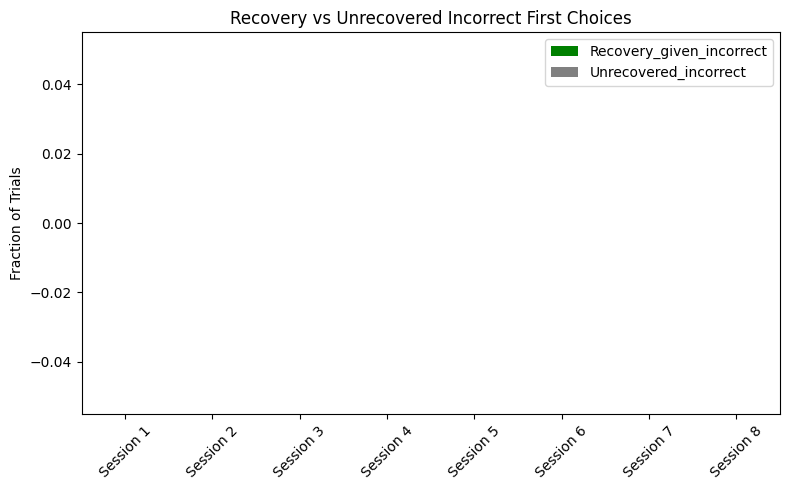

           Correct_first  Incorrect_first  Recovery_given_incorrect  \
Session 1            1.0              0.0                       0.0   
Session 2            1.0              0.0                       0.0   
Session 3            1.0              0.0                       0.0   
Session 4            1.0              0.0                       0.0   
Session 5            1.0              0.0                       0.0   
Session 6            1.0              0.0                       0.0   
Session 7            1.0              0.0                       0.0   
Session 8            1.0              0.0                       0.0   

           Mean_latency_correct  Mean_latency_incorrect   Latency_cost  \
Session 1         519298.666667                     0.0 -519298.666667   
Session 2         244739.000000                     0.0 -244739.000000   
Session 3         139855.000000                     0.0 -139855.000000   
Session 4         106548.166667                     0.0 -106548.

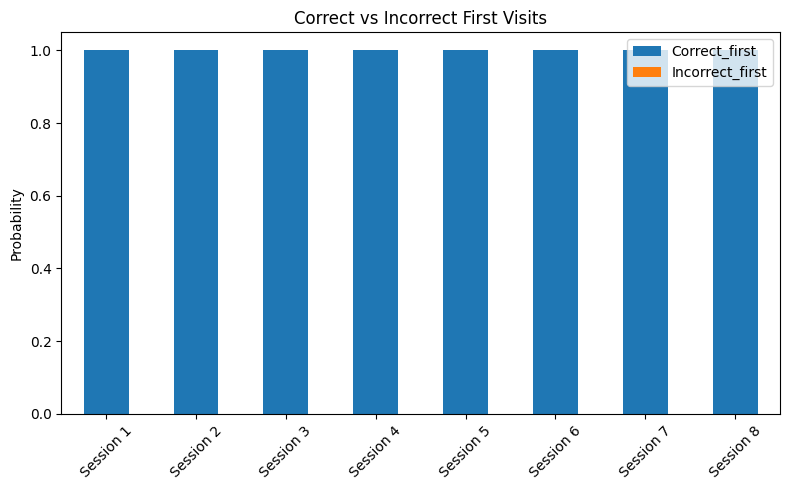

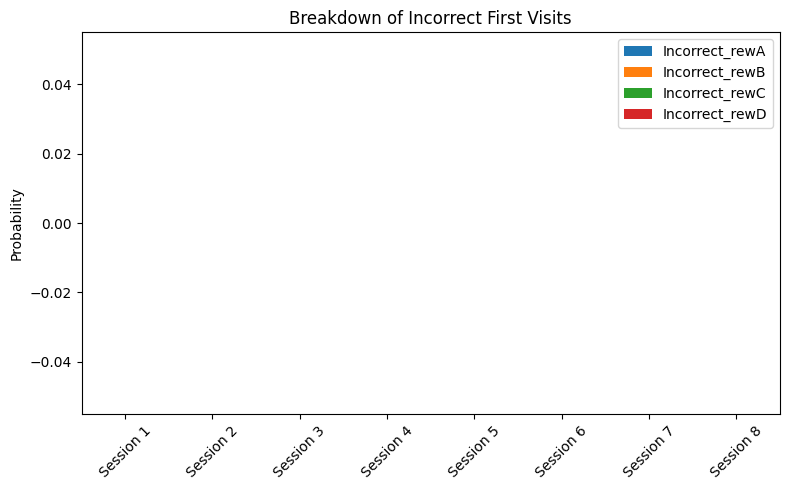

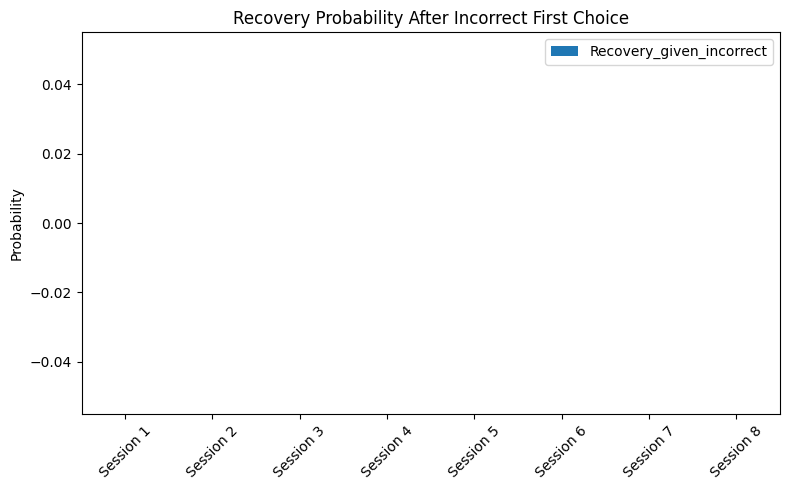

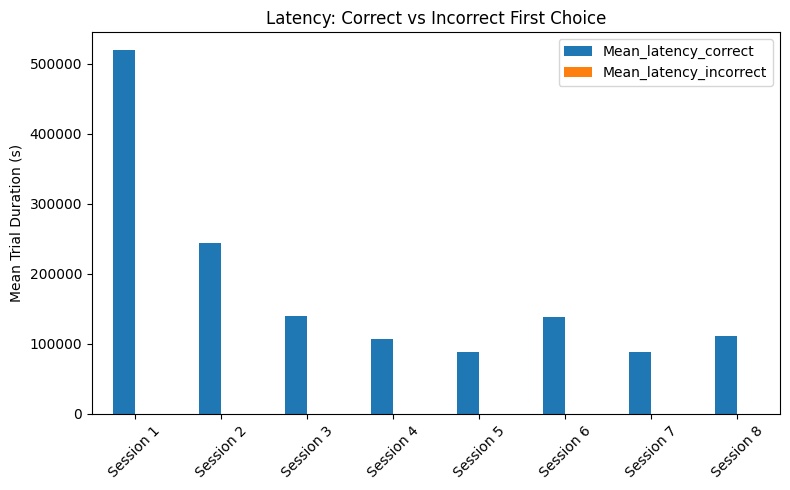

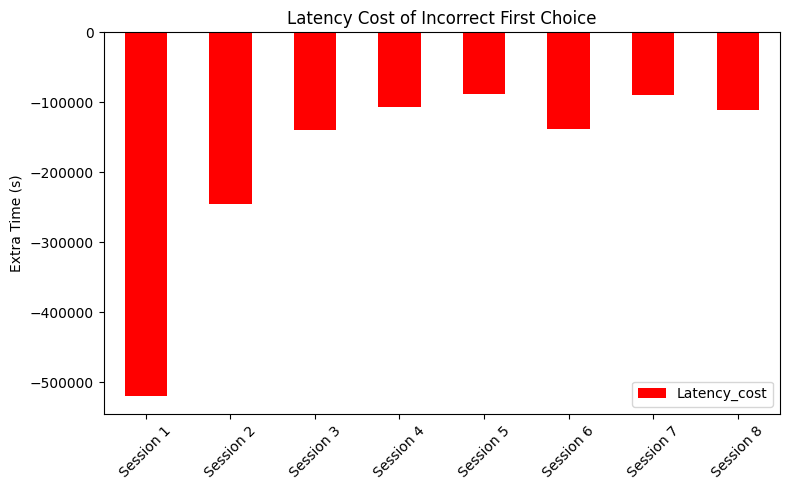

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_first_visit_recovery_latency(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)
        print(df)

        # Drop missing rows
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        # Calculate trial duration
        df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

        

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_df = df[df['first_reward_area_visited'] == df['area_rewarded']]
        incorrect_df = df[df['first_reward_area_visited'] != df['area_rewarded']]

        correct_first = len(correct_df)
        incorrect_first = len(incorrect_df)

        # Recovery rate (hit correct eventually)
        recovery_trials = incorrect_df[(incorrect_df['hit'] == 1) & (incorrect_df['rew_location'] == incorrect_df['area_rewarded'])]
        recovery_count = len(recovery_trials)

        # Mean latencies
        mean_correct_latency = correct_df['trial_duration'].mean() if len(correct_df) > 0 else 0
        mean_incorrect_latency = incorrect_df['trial_duration'].mean() if len(incorrect_df) > 0 else 0
        latency_cost = mean_incorrect_latency - mean_correct_latency

        # Incorrect breakdown
        incorrect_counts = incorrect_df['first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": incorrect_first / total_trials,
            "Recovery_given_incorrect": recovery_count / incorrect_first if incorrect_first > 0 else 0,
            "Mean_latency_correct": mean_correct_latency,
            "Mean_latency_incorrect": mean_incorrect_latency,
            "Latency_cost": latency_cost
        }

        # Breakdown of incorrect first visits
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_recovery_latency(summary_df):
    # Correct vs incorrect first
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Correct vs Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Breakdown incorrect
    incorrect_cols = [c for c in summary_df.columns if c.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Breakdown of Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Recovery
    summary_df[['Recovery_given_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Recovery Probability After Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    # Latency cost
    summary_df[['Mean_latency_correct', 'Mean_latency_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Mean Trial Duration (s)")
    plt.title("Latency: Correct vs Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    summary_df[['Latency_cost']].plot(
        kind='bar', figsize=(8, 5), rot=45, color="red")
    plt.ylabel("Extra Time (s)")
    plt.title("Latency Cost of Incorrect First Choice")
    plt.tight_layout()
    plt.show()


# Example usage

filepaths = [
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv",
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-21_11_14_226357session3.2/session_data_2024-08-21_11_14_22.csv",
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-22_14_33_316357session3.3/session_data_2024-08-22_14_33_31.csv",
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-23_10_42_226357session3.4/session_data_2024-08-23_10_42_22.csv",
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-27_13_05_196357session3.5/session_data_2024-08-27_13_05_19.csv",
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-28_11_58_146357session3.6/session_data_2024-08-28_11_58_14.csv",
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-29_10_23_026357session3.7/session_data_2024-08-29_10_23_02.csv",
    r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-30_10_07_556357session3.8/session_data_2024-08-30_10_07_55.csv"
]

summary = calculate_first_visit_recovery_latency(filepaths)
summary.index = [f"Session {i+1}" for i in range(len(summary))]
summary['Unrecovered_incorrect'] = summary['Incorrect_first'] - (summary['Recovery_given_incorrect'] * summary['Incorrect_first'])

summary[['Recovery_given_incorrect', 'Unrecovered_incorrect']].plot(
    kind='bar', stacked=True, figsize=(8, 5), rot=45, color=['green', 'gray']
)
plt.ylabel("Fraction of Trials")
plt.title("Recovery vs Unrecovered Incorrect First Choices")
plt.tight_layout()
plt.show()

print(summary)

plot_first_visit_recovery_latency(summary)


In [ ]:
for i in filepaths:    
    df = pd.read_csv(i)


    print(len(df.index[df["hit"] == 1.0]))
# df.describe()
# for i in df["hit"].unique():
#     print(i)
# df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

# df

3
5
1
6
6
12
13
14


In [42]:
df = pd.read_csv(filepaths[1])
df


,hit,miss,incorrect,rew_location,area_rewarded,time_to_reward,trial_start_time,end_trial_time,mouse_enter_time,first_reward_area_visited,entrance1,entrance2,rewA,rewB,rewC,rewD
0,NaN,NaN,1.0,D,NaN,NaN,27,186484,56941.0,rewA,3832,4037,15350.0,22675.0,17139.0,9223.0
1,NaN,1.0,NaN,C,NaN,NaN,186498,322007,NaN,rewC,9273,6338,13882.0,6864.0,32799.0,16294.0
2,NaN,NaN,1.0,C,NaN,NaN,322013,369797,NaN,rewB,6920,708,10476.0,11458.0,NaN,NaN
3,NaN,NaN,1.0,D,NaN,NaN,369801,574217,NaN,rewC,1104,3397,7040.0,19301.0,43785.0,14277.0
4,NaN,NaN,1.0,A,NaN,NaN,574232,619023,594618.0,rewB,4918,4294,NaN,1397.0,NaN,NaN
5,1.0,NaN,NaN,C,C,43056.0,619032,803169,659241.0,rewC,3714,1609,8686.0,3655.0,65665.0,15099.0
6,NaN,1.0,NaN,A,NaN,NaN,803183,849427,845696.0,NaN,986,515,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,D,NaN,NaN,849438,964606,921287.0,rewC,1133,459,7987.0,6885.0,4469.0,4565.0
8,1.0,NaN,NaN,C,C,112200.0,964616,1171542,1065214.0,rewC,1578,589,10801.0,3828.0,31020.0,13973.0
9,NaN,1.0,NaN,A,NaN,NaN,1171557,1287242,1278751.0,NaN,1128,801,NaN,NaN,NaN,NaN


In [ ]:

results = {}

for path in filepaths:
    df = pd.read_csv(path)
    

    # Drop missing rows
    df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

    # Calculate trial duration
    df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

    df["first_reward_area_visited"] = df["first_reward_area_visited"].astype(str).str[-1]

    total_trials = len(df)
    if total_trials == 0:
        continue

    # Correct first visit -- 
    correct_df = df[df['first_reward_area_visited'] == df['area_rewarded']]
    incorrect_df = df[df['first_reward_area_visited'] != df['area_rewarded']]

    correct_first = len(correct_df)
    incorrect_first = len(incorrect_df)

    # Recovery rate (hit correct eventually)
    recovery_trials = incorrect_df[(incorrect_df['hit'] == 1.0) & (incorrect_df['rew_location'] == incorrect_df['area_rewarded'])]
    recovery_count = len(recovery_trials)

    # Mean latencies
    mean_correct_latency = correct_df['trial_duration'].mean() if len(correct_df) > 0 else 0
    mean_incorrect_latency = incorrect_df['trial_duration'].mean() if len(incorrect_df) > 0 else 0
    latency_cost = mean_incorrect_latency - mean_correct_latency

    # Incorrect breakdown
    incorrect_counts = incorrect_df['first_reward_area_visited'].value_counts()

    stats = {
        "Correct_first": correct_first / total_trials,
        "Incorrect_first": incorrect_first / total_trials,
        "Recovery_given_incorrect": recovery_count / incorrect_first if incorrect_first > 0 else 0,
        "Mean_latency_correct": mean_correct_latency,
        "Mean_latency_incorrect": mean_incorrect_latency,
        "Latency_cost": latency_cost
    }

    # Breakdown of incorrect first visits
    for area in ['rewA', 'rewB', 'rewC', 'rewD']:
        stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

    results[path] = stats



TypeError: unhashable type: 'Series'

In [88]:
file = filepaths[0]
print(file)
df = pd.read_csv(file)
# Drop missing rows
df = df.dropna(subset=['first_reward_area_visited'])

# here we get the total time of the trial (end_trial_time - trial_start_time)
df.insert(5, "first_reward_area_visited_char", df["first_reward_area_visited"].astype(str).str[-1])


# Calculate trial duration
# df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

df



C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv


,hit,miss,incorrect,rew_location,area_rewarded,first_reward_area_visited_char,time_to_reward,trial_start_time,end_trial_time,mouse_enter_time,first_reward_area_visited,entrance1,entrance2,rewA,rewB,rewC,rewD
1,1.0,NaN,NaN,A,A,A,10018.0,39674,100622,48128.0,rewA,2324,2462,6195.0,6611.0,12464.0,7043.0
2,NaN,NaN,1.0,D,NaN,A,NaN,100637,261604,NaN,rewA,554,4470,16298.0,33267.0,31317.0,NaN
3,NaN,1.0,NaN,D,NaN,D,NaN,261619,328171,NaN,rewD,2963,2261,NaN,NaN,10034.0,8478.0
5,NaN,1.0,NaN,A,NaN,A,NaN,346785,505990,NaN,rewA,1275,4165,36003.0,30063.0,5248.0,5028.0
7,NaN,NaN,1.0,C,NaN,A,NaN,507902,555708,NaN,rewA,5823,3034,7682.0,13045.0,NaN,NaN
8,NaN,NaN,1.0,D,NaN,C,NaN,555719,590107,NaN,rewC,5201,2263,NaN,NaN,11970.0,NaN
11,NaN,NaN,1.0,A,NaN,D,NaN,607918,911180,786683.0,rewD,347,5441,NaN,NaN,4660.0,2591.0
14,1.0,NaN,NaN,C,C,C,474380.0,1034770,1865304,1505346.0,rewC,2487,777,22646.0,21057.0,150907.0,26234.0
15,NaN,NaN,1.0,B,NaN,C,NaN,1865320,2076039,1945535.0,rewC,2503,5142,17193.0,11530.0,20639.0,16830.0
16,NaN,NaN,1.0,A,NaN,B,NaN,2076053,2091998,NaN,rewB,1284,985,NaN,1920.0,NaN,NaN
